In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
wine_df = pd.read_csv("wine_train.csv")

In [22]:
wine_df.head()

,type,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,W,5.8,0.180,0.37,1.1,0.036,31.0,96.0,0.98942,3.16,0.48,12.0,6
1,R,5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.99240,3.57,0.85,13.0,7
2,R,7.4,0.610,0.01,2.0,0.074,13.0,38.0,0.99748,3.48,0.65,9.8,5
3,W,7.0,0.310,0.26,7.4,0.069,28.0,160.0,0.99540,3.13,0.46,9.8,6
4,W,7.9,0.350,0.36,1.6,0.038,11.0,124.0,0.99280,3.25,0.48,11.0,5


In [23]:
# 目的変数の設定
Y = wine_df.quality.values
# 説明変数の設定
# ワイン情報からtypeとqualityを除去
#  axis = 1 で列の削除であることを明示
wine_df = wine_df.drop(["type", "quality"], axis=1)
X = wine_df.as_matrix()

In [24]:
wine_df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,5.8,0.180,0.37,1.1,0.036,31.0,96.0,0.98942,3.16,0.48,12.0
1,5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.99240,3.57,0.85,13.0
2,7.4,0.610,0.01,2.0,0.074,13.0,38.0,0.99748,3.48,0.65,9.8
3,7.0,0.310,0.26,7.4,0.069,28.0,160.0,0.99540,3.13,0.46,9.8
4,7.9,0.350,0.36,1.6,0.038,11.0,124.0,0.99280,3.25,0.48,11.0


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

scores = []

In [27]:
#木の数が2のランダムフォレストの結果を返す
clf1 = RandomForestClassifier(n_estimators = 2)
validated = cross_val_score(clf1, X, Y, cv=10)
validated

/Users/ito_akihiro/.pyenv/versions/3.5.0/envs/ml-learning/lib/python3.5/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


array([ 0.53985507,  0.55253623,  0.51811594,  0.57168784,  0.54909091,
        0.5729927 ,  0.57481752,  0.58211679,  0.58029197,  0.55839416])

In [36]:
#1~41までの木の数のランダムフォレストを実行する。
for val in range(1,41):
    clf = RandomForestClassifier(n_estimators  =val)
    validated = cross_val_score(clf, X, Y, cv =5)
    scores.append(validated)

In [40]:
print(len(scores[0]))

10


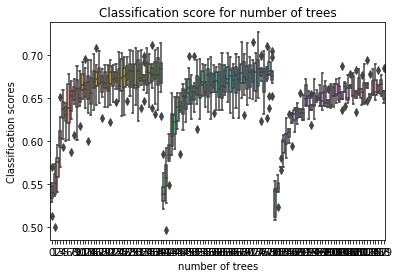

In [38]:
sns.boxplot(data=scores)
plt.xlabel('number of trees')
plt.ylabel('Classification scores')
plt.title('Classification score for number of trees')
plt.show()